In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def calculate_returns(data):
    returns = data.pct_change()*100
    return returns

def calculate_risk_reward_ratio(returns):
    mean_return = returns.mean()
    std_return = returns.std()
    risk_reward_ratio = mean_return / std_return
    return risk_reward_ratio

def calculate_correlation(returns):
    correlation_matrix = returns.corr()
    return correlation_matrix

def find_best_pairs(risk_reward_ratios, correlation_matrix):
    # Find top 5 stocks with highest risk/reward ratios
    top_5_stocks = risk_reward_ratios.nlargest(5).index.tolist()
    best_pairs = {}
       
    # Find least correlated stock for each of the top 5 stocks
    for stock in top_5_stocks:
        least_correlated_stock = correlation_matrix[stock].idxmin()
        best_pairs[stock] = least_correlated_stock

    return best_pairs


def calculate_moving_averages(data):
    short_rolling = data.rolling(window=20).mean()
    medium_rolling = data.rolling(window=50).mean()
    long_rolling = data.rolling(window=200).mean()
    return short_rolling, medium_rolling, long_rolling

In [46]:
def plot_data(data, medium_rolling, long_rolling, ticker):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(data, label='Price', color='blue')
    ax1.plot(medium_rolling, label='50-Day SMA', color='green')
    ax1.plot(long_rolling, label='200-Day SMA', color='red')
    ax1.set_ylabel('Price')
    
    ax1.set_title(f'Stock: {ticker}')  # Set the title with the stock ticker symbol

    # Calculate profit
    buy_signal = (medium_rolling > long_rolling) & (medium_rolling.shift(1) < long_rolling.shift(1))
    sell_signal = (medium_rolling < long_rolling) & (medium_rolling.shift(1) > long_rolling.shift(1))
    
    buy_prices = data[buy_signal]
    sell_prices = data[sell_signal]
    
    profit = 0
    while not buy_prices.empty and not sell_prices.empty:
        buy_index, buy_price = buy_prices.index[0], buy_prices.iloc[0]
        sell_index, sell_price = sell_prices.index[0], sell_prices.iloc[0]
        
        if sell_index > buy_index:
            profit += (sell_price - buy_price)
            print(f"Profit: {sell_price - buy_price}")
            buy_prices = buy_prices.drop(buy_index)
            sell_prices = sell_prices.drop(sell_index)
        elif buy_index > sell_index:
            profit += (sell_price - buy_price)
            print(f"Profit: {sell_price - buy_price}")
            sell_prices = sell_prices.drop(sell_index)
            buy_prices = buy_prices.drop(buy_index)
        else:
            break
    # Calculate profit for last trade without pair
    if not buy_prices.empty:
        # Last trade is a buy without a pair
        last_buy_price = buy_prices.iloc[0]
        current_price = data.iloc[-1]  # Current price is the last price in the data
        profit += (current_price - last_buy_price)
        print(f"Profit for Last Buy Trade without Pair: {current_price - last_buy_price}")
    elif not sell_prices.empty:
        # Last trade is a sell without a pair
        last_sell_price = sell_prices.iloc[0]
        current_price = data.iloc[-1]  # Current price is the last price in the data
        profit += (last_sell_price - current_price)
        print(f"Profit for Last Sell Trade without Pair: {last_sell_price - current_price}")

        
    print(f"Total Profit: {profit}")
        
    # Add buy and sell signals based on moving average crossovers
    ax1.plot(medium_rolling.index[buy_signal], medium_rolling[buy_signal], '^', markersize=10, color='g', lw=0, label='Buy Signal')
    ax1.plot(medium_rolling.index[sell_signal], medium_rolling[sell_signal], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
        
    # Manually create legend for buy and sell signals
    ax1.legend(loc='upper left')
    
    plt.show()


In [47]:
def plot_correlation(correlation_matrix):
    plt.figure(figsize=(16, 16))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    tickers = correlation_matrix.columns.tolist()
    plt.xticks(range(len(tickers)), tickers, rotation=90)
    plt.yticks(range(len(tickers)), tickers)
    plt.title('Correlation Matrix')
    for i in range(len(tickers)):
        for j in range(len(tickers)):
            plt.text(j, i, "{:.2f}".format(correlation_matrix.values[i, j]), ha='center', va='center', color='black')
    plt.show()

In [48]:
def plot_risk_reward(risk_reward_ratios, tickers):
    if isinstance(risk_reward_ratios, (float, np.float64)):
        # If risk_reward_ratios is a single float value, convert it to a list
        risk_reward_ratios = [risk_reward_ratios]
        tickers = [tickers]  # Assuming tickers is also a single value
        
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(risk_reward_ratios)), risk_reward_ratios, color='skyblue')
    plt.title('Risk/Reward Ratios')
    plt.xlabel('Stocks')
    plt.ylabel('Risk/Reward Ratio')
    plt.xticks(range(len(risk_reward_ratios)), range(1, len(risk_reward_ratios) + 1))
    
    # Add labels for each data point
    for i, ratio in enumerate(risk_reward_ratios):
        plt.text(i, ratio, f'{tickers[i]}', ha='center', va='bottom', fontsize=8)
    
    plt.show()


Enter the tickers of stocks you want to analyze (separated by commas): RELIANCE.NS,ITC.NS,BAJAJFINSV.NS,TCS.NS,INDUSINDBK.NS,TATASTEEL.NS,WIPRO.NS,COALINDIA.NS,TITAN.NS,APOLLOHOSP.NS,ULTRACEMCO.NS,HEROMOTOCO.NS,LTIM.NS,HINDALCO.NS,ONGC.NS,TATACONSUM.NS,CIPLA.NS,MARUTI.NS,NTPC.NS,BAJFINANCE.NS,KOTAKBANK.NS,BHARTIARTL.NS,NESTLEIND.NS,M&M.NS,SHRIRAMFIN.NS,^NSEI


[*********************100%%**********************]  26 of 26 completed


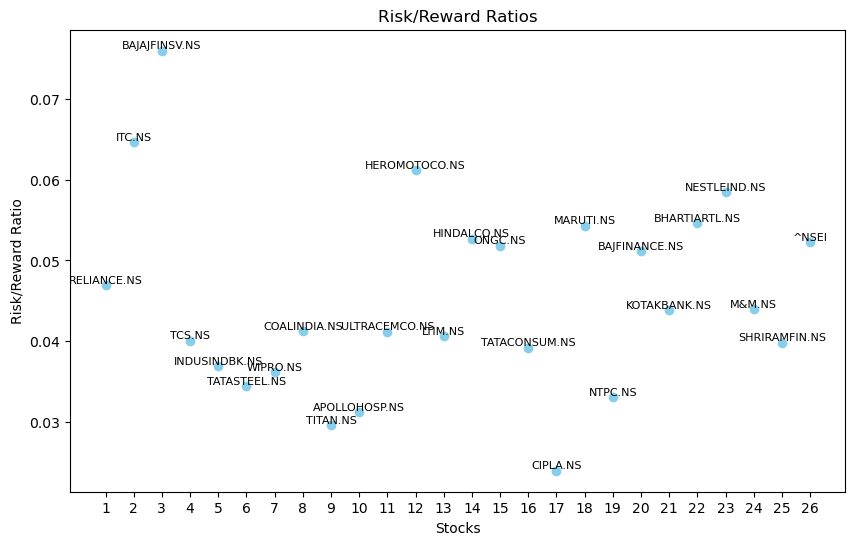

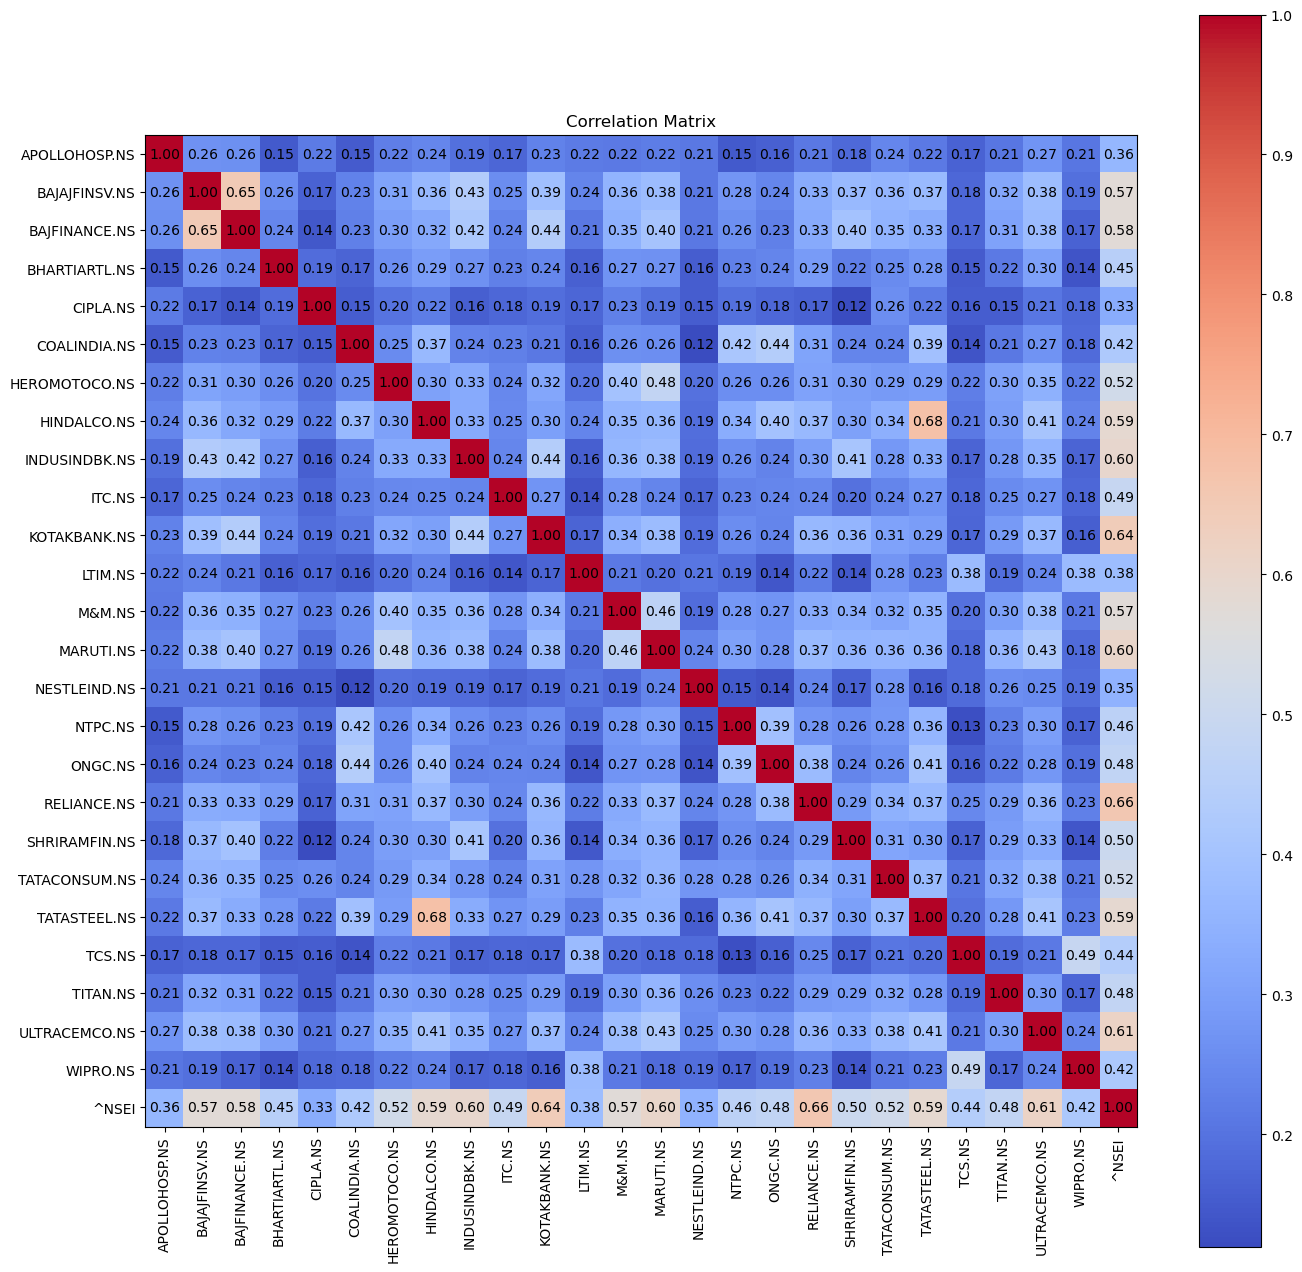

Profit: 22.90270233154297
Profit: -18.4112548828125
Profit: -46.478973388671875
Profit: -29.3248291015625
Profit: 65.66864013671875
Profit: 19.50048828125
Profit: -18.860107421875
Profit: -141.3768310546875
Profit: -129.583984375
Profit: -311.85302734375
Profit: -189.60205078125
Profit: 703.2451171875
Profit: -921.1669921875
Profit: -338.47265625
Profit: -689.080078125
Profit: -271.35498046875
Profit: -556.60009765625
Profit: -166.7490234375
Profit: 966.14453125
Profit: -835.8984375
Profit: -625.39990234375
Profit: -23.94970703125
Profit: -675.19970703125
Total Profit: -4211.901161193848


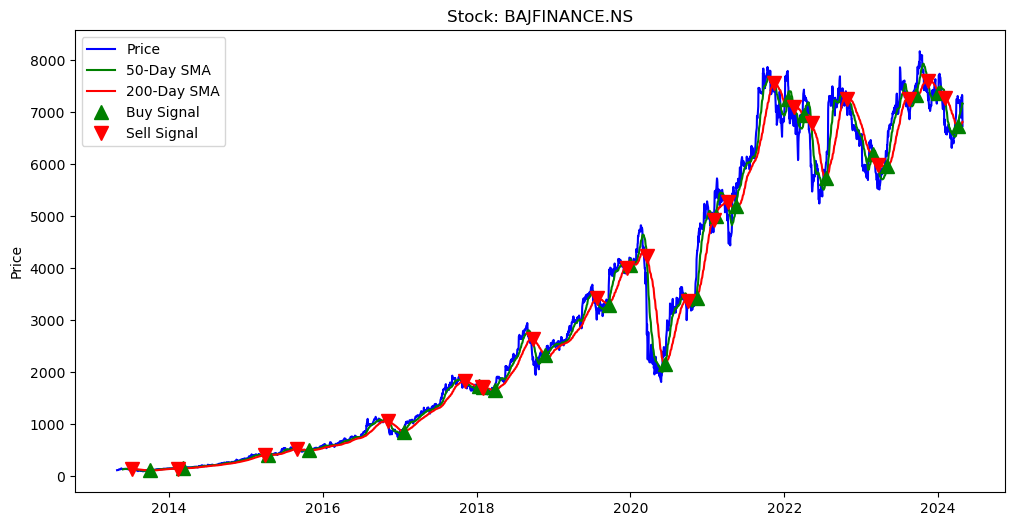

Profit: 11.036346435546875
Profit: -40.064056396484375
Profit: -22.968780517578125
Profit: 198.57620239257812
Profit: -31.99591064453125
Profit: -32.022216796875
Profit: -41.6103515625
Profit: -66.76898193359375
Profit: 45.54144287109375
Profit: 6.41998291015625
Profit: 57.292236328125
Profit: -41.51507568359375
Profit: -58.469970703125
Profit: 33.4993896484375
Profit: -14.749237060546875
Profit: -5.4031982421875
Profit: 2.252166748046875
Profit: -20.612152099609375
Profit: 149.51953125
Profit: 33.3792724609375
Profit: -17.67138671875
Profit: -51.48040771484375
Profit: 22.06298828125
Profit: 124.1993408203125
Profit: 235.11004638671875
Profit: 133.449951171875
Total Profit: 607.0071716308594


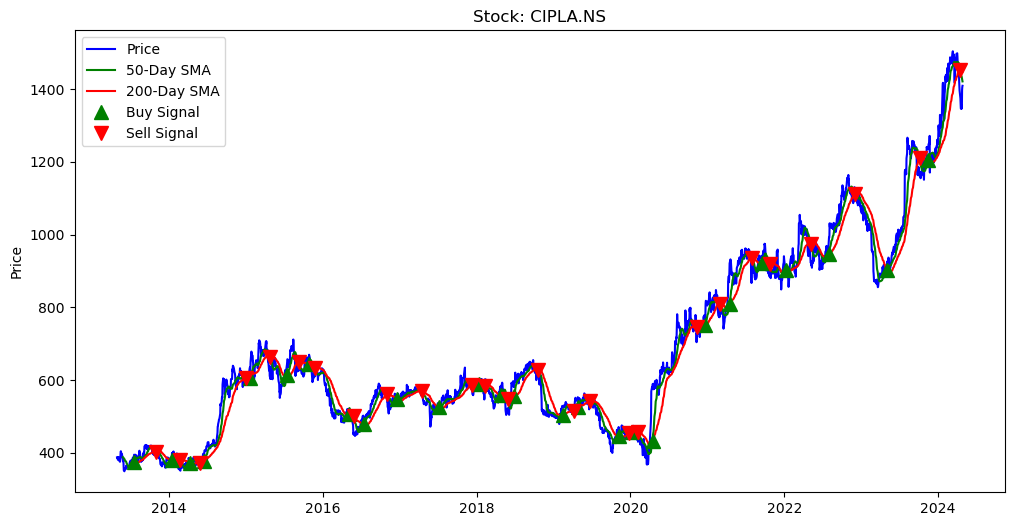

Profit: -26.259933471679688
Profit: -10.332595825195312
Profit: -1.7641143798828125
Profit: 3.5785980224609375
Profit: 0.9236907958984375
Profit: -6.363372802734375
Profit: -30.482620239257812
Profit: -1.9367523193359375
Profit: -15.624771118164062
Profit: -0.4972686767578125
Profit: 8.257400512695312
Profit: 34.14697265625
Profit: -3.406341552734375
Profit: -5.169036865234375
Profit: 2.409515380859375
Profit: 2.940460205078125
Profit: -12.333526611328125
Profit: 0.5142822265625
Profit: -0.4162139892578125
Profit: 19.790679931640625
Profit: 19.879928588867188
Profit: -11.289413452148438
Profit: -1.1524810791015625
Profit: 29.653091430664062
Profit: 113.43867492675781
Profit: 76.24066162109375
Profit: -30.99481201171875
Profit for Last Buy Trade without Pair: 12.45001220703125
Total Profit: 166.20071411132812


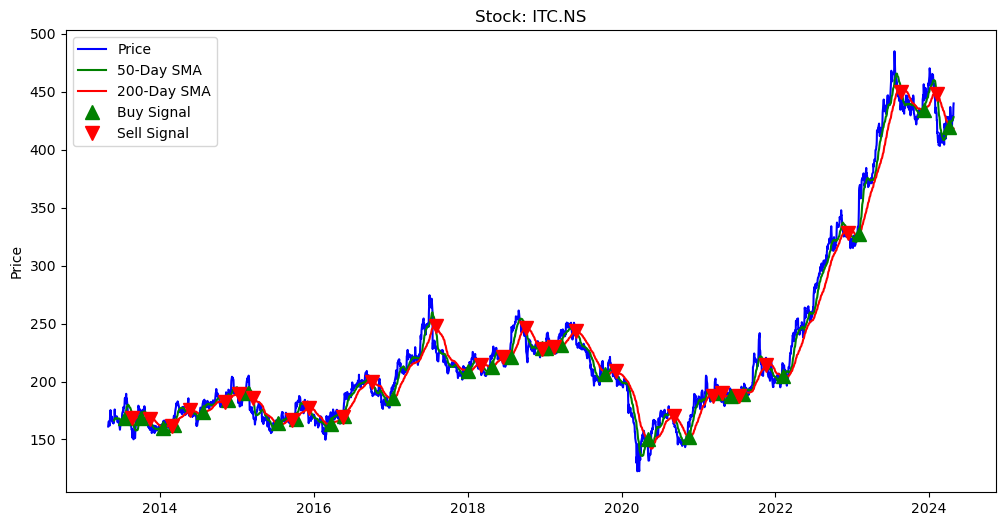

Profit: -6.217536926269531
Profit: -10.860870361328125
Profit: 18.20793914794922
Profit: -7.410980224609375
Profit: 1.3783645629882812
Profit: -1.448760986328125
Profit: 17.929611206054688
Profit: 0.4866943359375
Profit: -4.431846618652344
Profit: 10.42919921875
Profit: -3.0215988159179688
Profit: 4.9778900146484375
Profit: -4.728271484375
Profit: -0.5356369018554688
Profit: -2.7718887329101562
Profit: -0.77899169921875
Profit: -6.0269317626953125
Profit: 1.1552352905273438
Profit: -13.86444091796875
Profit: -2.1264495849609375
Profit: -3.7269363403320312
Profit: 4.9546356201171875
Profit: 11.267974853515625
Profit: 0.06500244140625
Profit: 13.266525268554688
Profit: 12.665679931640625
Profit: -7.9423980712890625
Profit: 3.6868743896484375
Profit for Last Buy Trade without Pair: 186.25836181640625
Total Profit: 210.8364486694336


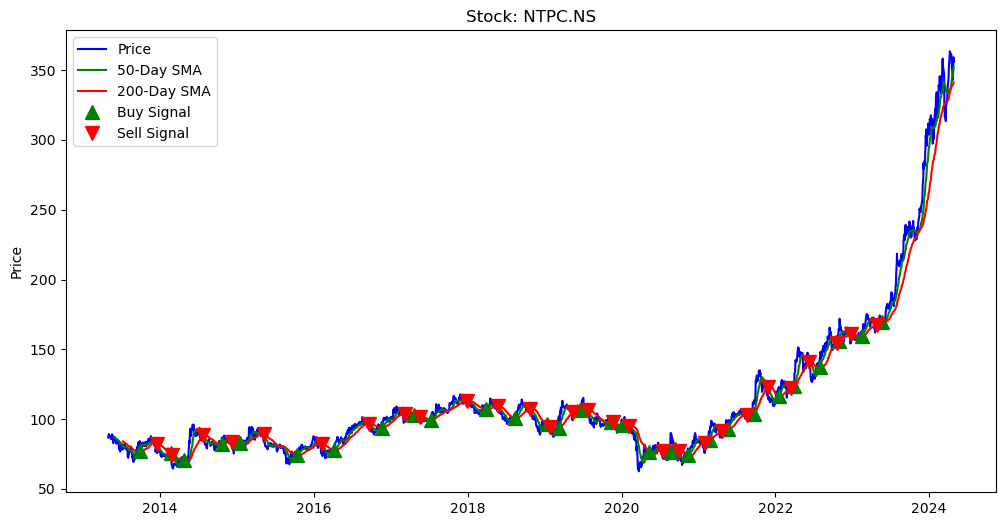

Profit: 7.94732666015625
Profit: 31.41698455810547
Profit: 27.62268829345703
Profit: 32.990264892578125
Profit: 1.9625396728515625
Profit: -11.655838012695312
Profit: -0.9025421142578125
Profit: 84.30963134765625
Profit: 103.44229125976562
Profit: 71.12078857421875
Profit: -15.8782958984375
Profit: -6.375274658203125
Profit: 119.12811279296875
Profit: 9.69036865234375
Profit: 30.32763671875
Profit: 64.30950927734375
Profit: 81.7525634765625
Profit: 263.941650390625
Profit: 632.426513671875
Profit: -154.622802734375
Profit: -223.691650390625
Profit: 220.1290283203125
Profit: 86.424072265625
Profit: 84.25
Profit: -34.75
Profit for Last Buy Trade without Pair: -80.5999755859375
Total Profit: 1424.715591430664


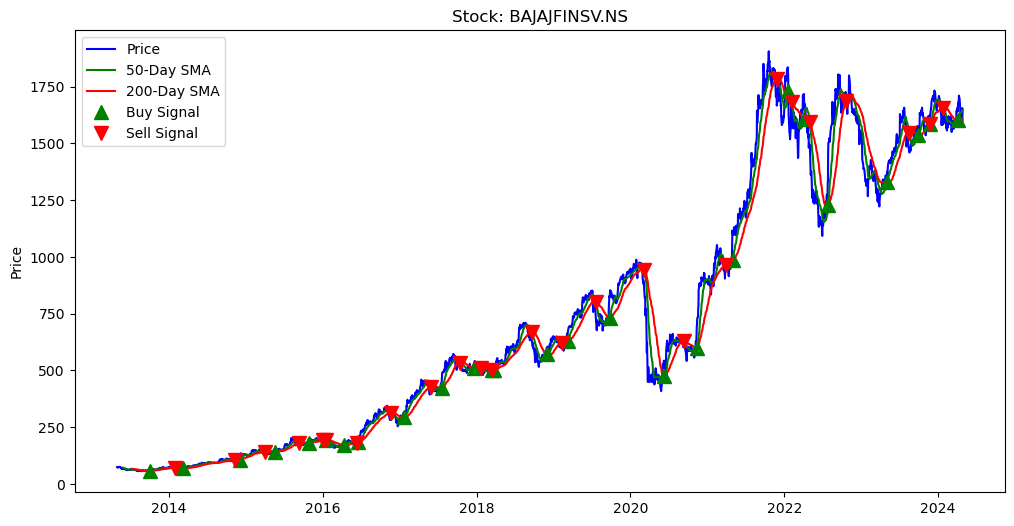

Profit: -27.163482666015625
Profit: -14.464920043945312
Profit: 136.4947967529297
Profit: 14.36767578125
Profit: -1.257598876953125
Profit: -27.61907958984375
Profit: 50.337890625
Profit: -8.422119140625
Profit: 258.698486328125
Profit: 150.61505126953125
Profit: -27.295654296875
Profit: -108.1864013671875
Profit: 179.32806396484375
Profit: -24.7757568359375
Profit: -250.817138671875
Profit: 493.35760498046875
Profit: -121.6800537109375
Profit: 763.412109375
Profit: -164.185302734375
Profit: -251.641845703125
Profit: 323.103271484375
Profit: 518.42431640625
Profit: 231.5
Profit: 225.5498046875
Profit: -53.5
Profit for Last Buy Trade without Pair: -174.599853515625
Total Profit: 2089.579864501953


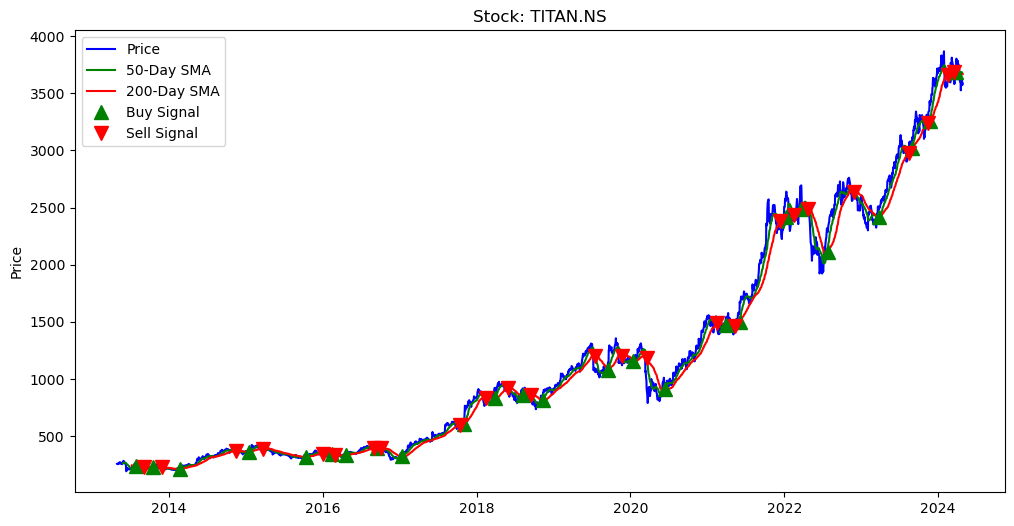

Profit: -21.233154296875
Profit: -57.6260986328125
Profit: -9.9088134765625
Profit: -67.5936279296875
Profit: 22.916015625
Profit: -13.69189453125
Profit: -75.947509765625
Profit: -20.002197265625
Profit: 11.076416015625
Profit: -57.715576171875
Profit: -3.71673583984375
Profit: -116.59661865234375
Profit: -61.4617919921875
Profit: -39.8643798828125
Profit: -69.14404296875
Profit: -251.873291015625
Profit: -126.146240234375
Profit: -177.5555419921875
Profit: -122.31103515625
Profit: -127.030029296875
Profit: -110.49951171875
Profit: 210.9678955078125
Profit: -249.631103515625
Profit: -207.26220703125
Profit: -289.7666015625
Profit: -60.77294921875
Profit: -160.8388671875
Profit: 107.7626953125
Profit: -140.04541015625
Profit: -214.480224609375
Profit: -0.93408203125
Profit: -56.39453125
Profit: -265.3701171875
Profit for Last Sell Trade without Pair: 157.89990234375
Total Profit: -2664.791259765625


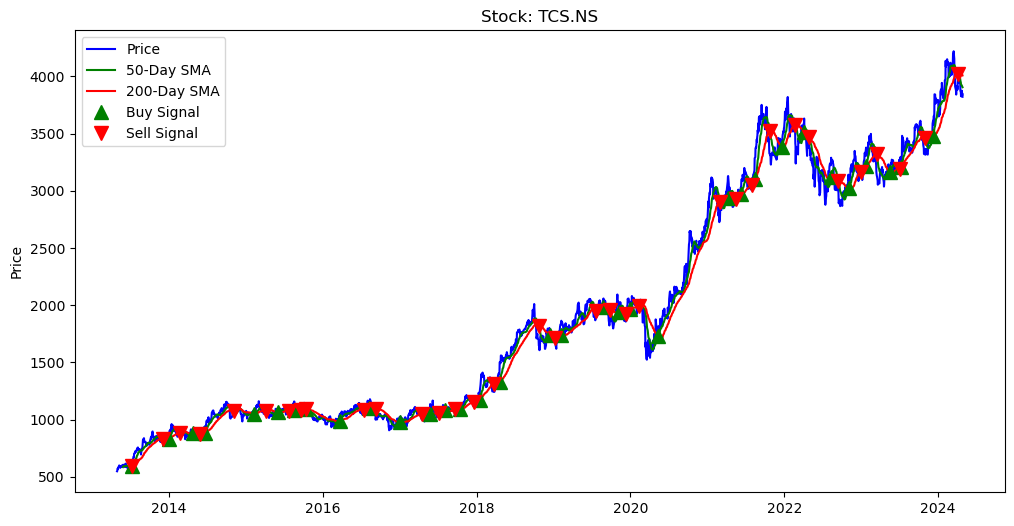

Profit: 110.52349853515625
Profit: 578.0388793945312
Profit: 157.322265625
Profit: -79.853759765625
Profit: -48.953125
Profit: -149.2515869140625
Profit: -125.9644775390625
Profit: 2133.483154296875
Profit: -375.77197265625
Profit: 1743.727783203125
Profit: -1113.45947265625
Profit: -92.38818359375
Profit: -360.64794921875
Profit: 100.56396484375
Profit: 45.91455078125
Profit: 7.62060546875
Profit: -107.9501953125
Total Profit: 2422.9539794921875


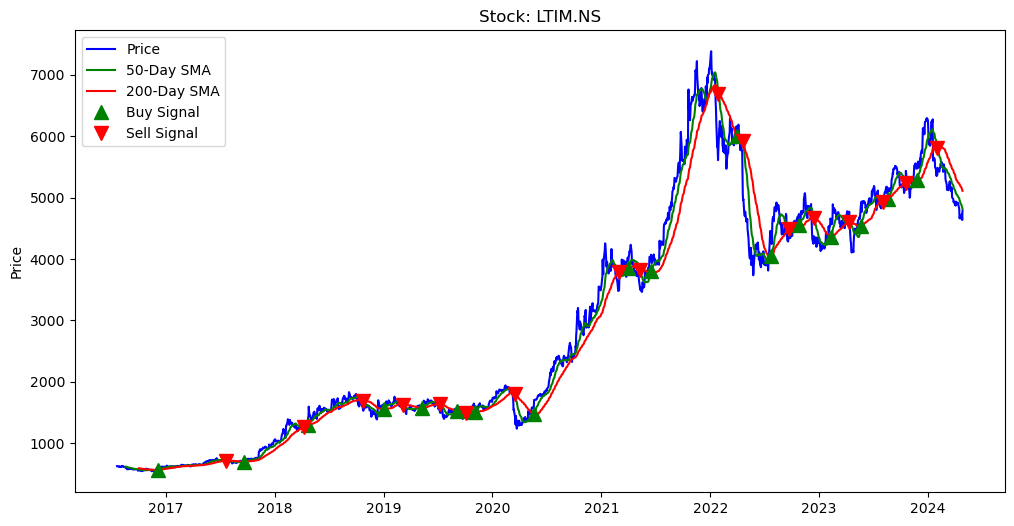

In [49]:
def main():
    tickers = input("Enter the tickers of stocks you want to analyze (separated by commas): ").split(',')   
    start_date = '2013-04-29'
    end_date = '2024-04-29'
    
    # Fetch data
    data = fetch_data(tickers, start_date, end_date)
    
    # Calculate returns
    returns = calculate_returns(data)
    
    # Calculate risk/reward ratios
    risk_reward_ratios = calculate_risk_reward_ratio(returns)
    
    # Plot risk/reward ratios
    plot_risk_reward(risk_reward_ratios, tickers)
    
    # Calculate correlation matrix
    correlation_matrix = calculate_correlation(returns)
    
    # Plot correlation matrix
    plot_correlation(correlation_matrix)
    
    # Find best pairs
    best_pairs = find_best_pairs(risk_reward_ratios, correlation_matrix)
    
    all_stocks = set(best_pairs.keys())
    for stock, least_correlated_stock in best_pairs.items():
        all_stocks.add(least_correlated_stock)
    
    # Calculate and plot moving averages for all stocks in the set
    for ticker in all_stocks:
        short_rolling, medium_rolling, long_rolling = calculate_moving_averages(data[ticker])
        plot_data(data[ticker], short_rolling, medium_rolling, ticker)


if __name__ == "__main__":
    main()